In [1]:
path = "datasets/bank-full.csv"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [7]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical =['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
target = 'y'

In [9]:
data.y = (data.y == 'yes').astype(int)

In [10]:
data[data.y == 1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1


In [11]:
data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [12]:
y_train = data_train.y.values
y_val = data_val.y.values
y_test = data_test.y.values

In [13]:
del data_train[target]
del data_val[target]
del data_test[target]

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = data_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [25]:
val_dict = data_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
y_desision = (y_pred >= 0.5)
(y_val == y_desision).mean()

np.float64(0.8974784339747843)

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
cols = ['balance', 'day', 'duration', 'previous']

for col in cols:
    auc = roc_auc_score(y_train, data_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -data_train[col])
    print(f"Variable: {col}, AUC: {auc}")

Variable: balance, AUC: 0.5888313805382317
Variable: day, AUC: 0.525957882383908
Variable: duration, AUC: 0.8147002759670778
Variable: previous, AUC: 0.5985653242764153


In [26]:
roc_auc_score(y_val, y_pred)

np.float64(0.9006884713944792)

In [29]:
thresholds = np.linspace(0.0, 1.0, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [40]:
precisions = []
recalls = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    precisions.append(p)
    recalls.append(r)

C:\Users\Админ\AppData\Local\Temp\ipykernel_39276\4029861724.py:16: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


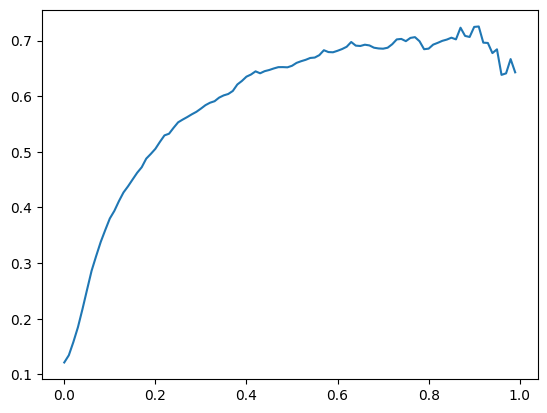

In [41]:
plt.plot(thresholds, precisions)

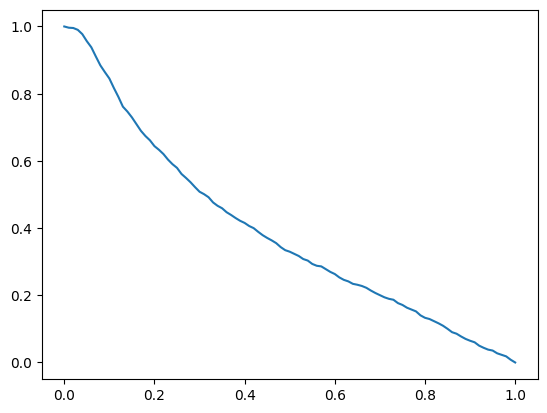

In [42]:
plt.plot(thresholds, recalls)

Text(0, 0.5, 'Value')

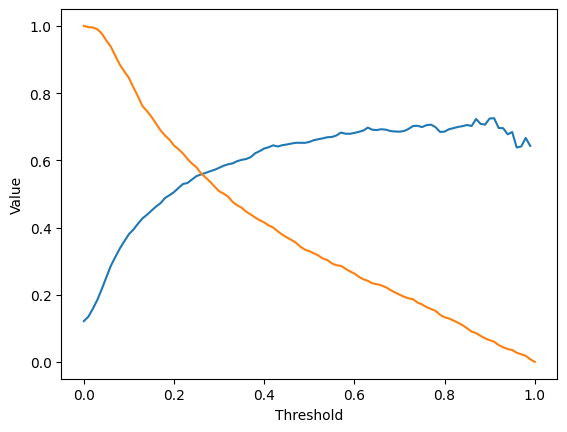

In [43]:
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Value")

In [49]:
f_1s = dict()
for i in range(len(thresholds)):
    f_1 = 2 * ((precisions[i] * recalls[i]) / (precisions[i] + recalls[i]))
    f_1s[thresholds[i]] = f_1

In [53]:
print(f_1s[0.02])
print(f_1s[0.22])
print(f_1s[0.42])
print(f_1s[0.62])

0.27301111527413513
0.5713087248322147
0.49353569421023047
0.3624161073825503


In [54]:
from sklearn.model_selection import KFold

In [55]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [57]:
scores = []
for train_idx, val_idx in kfold.split(data_full_train):
    data_train = data_full_train.iloc[train_idx]
    data_val = data_full_train.iloc[val_idx]
    y_train = data_train.y.values
    y_val = data_val.y.values

    train_dict = data_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    val_dict = data_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.fit_transform(val_dict)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    scores.append(roc_auc_score(y_val, y_pred))

In [58]:
scores

[np.float64(0.8993733054494373),
 np.float64(0.898944421423942),
 np.float64(0.9112805043937209),
 np.float64(0.9081388806828126),
 np.float64(0.9119843456804715)]

In [59]:
np.std(scores)

np.float64(0.005691215739889739)

In [60]:
!pip install tqdm

     -------------------------------------- 78.4/78.4 kB 724.6 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
from tqdm.auto import tqdm

E:\My_projects\ML\Zoomcamp\Task_1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
for c in [0.000001, 0.001, 1]:
    scores = []
    for train_idx, val_idx in kfold.split(data_full_train):
        data_train = data_full_train.iloc[train_idx]
        data_val = data_full_train.iloc[val_idx]
        y_train = data_train.y.values
        y_val = data_val.y.values
    
        train_dict = data_train[categorical + numerical].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        
        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(X_train, y_train)
        
        val_dict = data_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.fit_transform(val_dict)
        
        y_pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val, y_pred))
    print('C=%s %.3f +- %.3f' % (c, np.mean(scores), np.std(scores)))

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.006
